# **Task 1: Exploratory Data Analysis**

Segment the dataset and draw unique insights including visualization of transaction volume, and assessing the effect of any outliers.



## **Background Information**

The tast is based on a synthesized transaction dataset containing 3 months' worth of trasnactions for 100 hypothetical customers. It contains purchases recurring transactions, and salary transactions.

The dataset is designed to simulated realistic transcation behaviour that are found in ANZ's real transaction data so many of the inisghts you gather will be genuine.

## **The Task**

1. Load the transactiondataset below into analysis tool of your choice. \

2. Start by doing some basic checks - Data issues? Requires cleaning? \

3. Gather some overall insights about the data: \
  $(i)$ what is the average transaction amount? \
  $(ii)$ How many transactions do customers make each month, on average? \

4. Segment the dataset transaction date and time. Visualize volume and spending over the course of an average day, or week. Consider the effect of any outliers that may distort your analysis. \

5. For challenge - what insights can you draw from the location information provided in the dataset?

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
import warnings
warnings.filterwarnings('ignore')

In [3]:
uploaded = files.upload()

Saving ANZ synthesised transaction dataset.xlsx to ANZ synthesised transaction dataset.xlsx


In [109]:
# 1. Load dataset
df = pd.read_excel("ANZ synthesised transaction dataset.xlsx")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

In [ ]:
# 2. Perform basic checks

## 2.1 Number of unique customers
print("Number of unique customers:", df['customer_id'].nunique())

Number of unique customers: 100


In [ ]:
## 2.2 Number of unique transactions
print("Number of unique transactions:", df['transaction_id'].nunique())

Number of unique transactions: 12043


In [ ]:
## 2.3 Check the date column
df.date.describe()

,date
count,12043
mean,2018-09-15 21:27:39.951839232
min,2018-08-01 00:00:00
25%,2018-08-24 00:00:00
50%,2018-09-16 00:00:00
75%,2018-10-09 00:00:00
max,2018-10-31 00:00:00


In [ ]:
## 2.4 Figure out missing date: Create a date range in pandas and then take the difference between this date range
## and the df.date column
df['just_date'] = pd.to_datetime(df.date).dt.date
date_range = pd.date_range(start=df.date.min(), end=df.date.max())
date_diff = date_range.difference(df['just_date'])
print("Missing date:", pd.DataFrame(date_diff))

Missing date:            0
0 2018-08-16


In [ ]:
## 2.5 Check for missing values
missing = df.isnull().sum()

# Only show columns with missing values (missing > 0)
missing = missing[missing > 0]
missing_percentage = round(missing / len(df) * 100, 2)
missing_df = pd.DataFrame({'Missing Values': missing, 'Percentage': missing_percentage}).sort_values(by='Percentage', ascending=False)
print(missing_df)

# The Merchant Code and Bpay Biller Code columns seem to have the highest missing percentages
# This could be due to the fact that a lot of the transactions are not based on purchases.

                   Missing Values  Percentage
merchant_code               11160       92.67
bpay_biller_code            11158       92.65
card_present_flag            4326       35.92
merchant_id                  4326       35.92
merchant_suburb              4326       35.92
merchant_state               4326       35.92
merchant_long_lat            4326       35.92


In [ ]:
## 2.6 Descriptive statistics of numerical variables
df.describe()

,card_present_flag,merchant_code,balance,date,age,amount
count,7717.000000,883.0,12043.000000,12043,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,2018-09-15 21:27:39.951839232,30.582330,187.933588
min,0.000000,0.0,0.240000,2018-08-01 00:00:00,18.000000,0.100000
25%,1.000000,0.0,3158.585000,2018-08-24 00:00:00,22.000000,16.000000
50%,1.000000,0.0,6432.010000,2018-09-16 00:00:00,28.000000,29.000000
75%,1.000000,0.0,12465.945000,2018-10-09 00:00:00,38.000000,53.655000
max,1.000000,0.0,267128.520000,2018-10-31 00:00:00,78.000000,8835.980000
std,0.398029,0.0,31503.722652,NaN,10.046343,592.599934


In [ ]:
# 3. Exploratory Data Analysis

## 3.1 Categorical Variables: skip these columns since they are mainly identifiers
## bpay_id, Account, merchant_id, merchant_code, First_name, transaction_id, customer_id


In [ ]:
# Status
df['status'].value_counts(dropna = False)

,count
status,
authorized,7717
posted,4326


In [ ]:
# Card Present flag: when neither customer nor card physically present
df['card_present_flag'].value_counts(dropna = False)

,count
card_present_flag,
1.0,6194
NaN,4326
0.0,1523


In [ ]:
# Longitude and Latitude
df.long_lat.nunique()

100

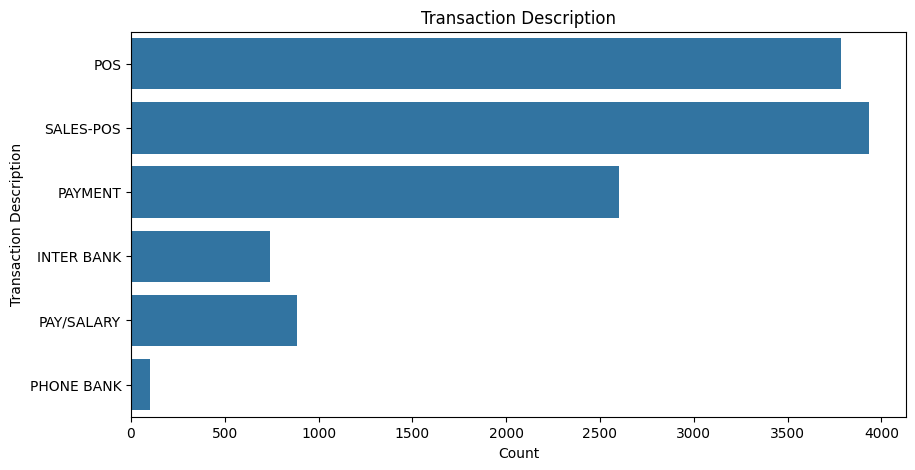

In [ ]:
# Transaction description: Types of transactions
df['txn_description'].value_counts(dropna = False)
plt.figure(figsize = (10, 5))
sns.countplot(data = df, y = 'txn_description')
plt.ylabel('Transaction Description')
plt.xlabel('Count')
plt.title('Transaction Description')
plt.show()

In [ ]:
# Average Transaction amount by Category
  # 1. Select the columns you want to look at (numerical, categorical)
  # 2. Group by the column you want to aggregate by
  # 3. Apply the aggregate function (mean, median, mode, sum, et al)
  # 4. Sort the values by the aggregated amount

df[['txn_description', 'amount']].groupby('txn_description').mean().sort_values(by='amount', ascending=False)


,amount
txn_description,
PAY/SALARY,1898.728029
PHONE BANK,106.099010
INTER BANK,86.699461
PAYMENT,77.613077
POS,40.407412
SALES-POS,39.909789


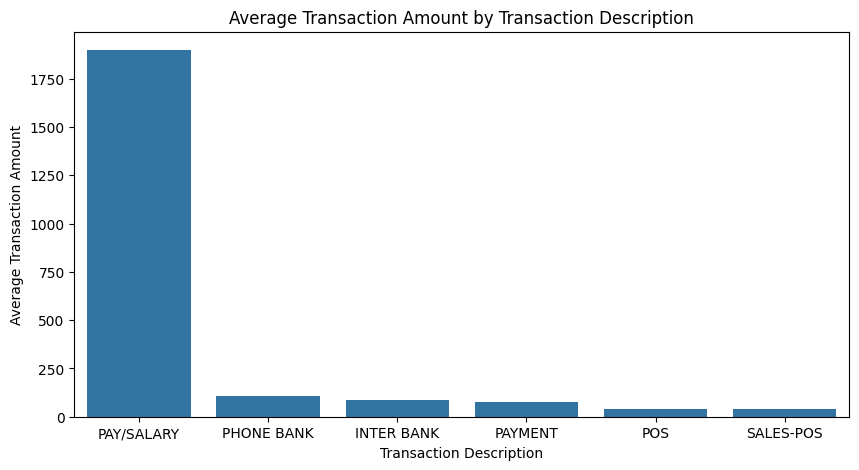

In [ ]:
# Visualize
agg = df[['txn_description', 'amount']].groupby('txn_description').mean().sort_values(by='amount', ascending=False)
plt.figure(figsize = (10, 5))
sns.barplot(data = agg, x = agg.index, y = 'amount')
plt.xlabel('Transaction Description')
plt.ylabel('Average Transaction Amount')
plt.title('Average Transaction Amount by Transaction Description')
plt.show()

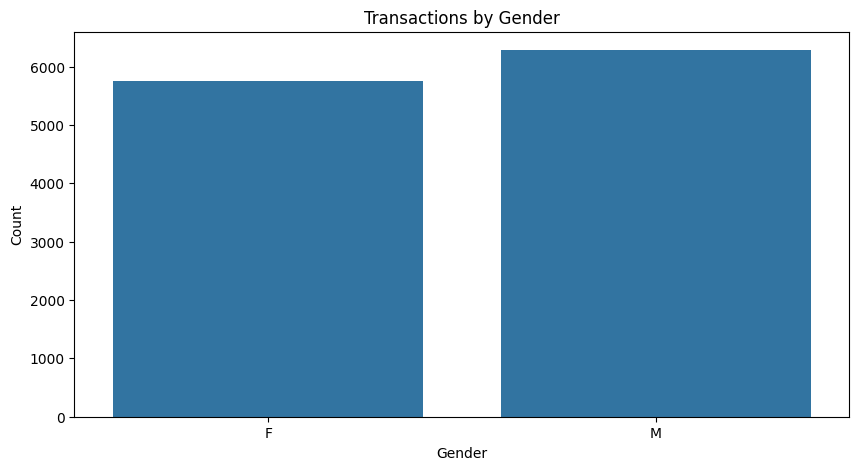

In [ ]:
# Gender
df['gender'].value_counts(dropna = False)
plt.figure(figsize = (10, 5))
sns.countplot(data = df, x = 'gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Transactions by Gender')
plt.show()

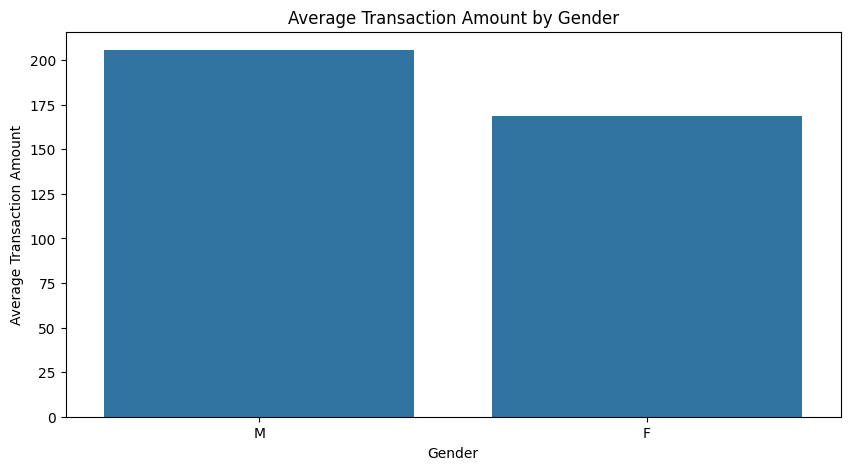

In [ ]:
# Average transaction amount by gender
gender_agg = df[['gender', 'amount']].groupby('gender').mean().sort_values(by='amount', ascending=False)
plt.figure(figsize = (10, 5))
sns.barplot(data = gender_agg, x = gender_agg.index, y = 'amount')
plt.xlabel('Gender')
plt.ylabel('Average Transaction Amount')
plt.title('Average Transaction Amount by Gender')
plt.show()

In [ ]:
# Merchant suburbs
merch_agg = pd.DataFrame(df['merchant_suburb'].value_counts(dropna=False)).reset_index().sort_values(by='count', ascending=False)
merch_agg.columns = ['merchant_suburb', 'count']

merch_agg.head(5)

,merchant_suburb,count
0,NaN,4326
1,Melbourne,255
2,Sydney,233
3,Southport,82
4,Brisbane City,79


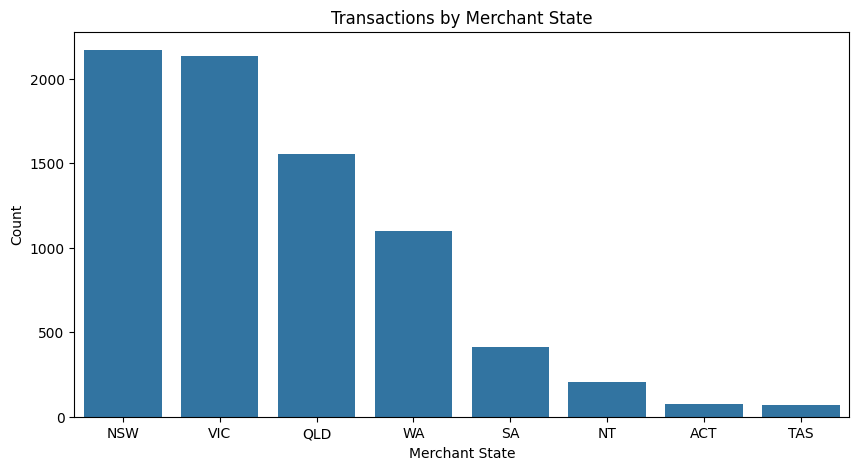

In [ ]:
# Merchane State
merch_agg = pd.DataFrame(df['merchant_state'].value_counts(dropna=False)).reset_index().sort_values(by='count', ascending=False)
merch_agg.columns = ['merchant_state', 'count']

plt.figure(figsize = (10, 5))
sns.barplot(data = merch_agg, x = 'merchant_state', y = 'count')
plt.xlabel('Merchant State')
plt.ylabel('Count')
plt.title('Transactions by Merchant State')
plt.show()

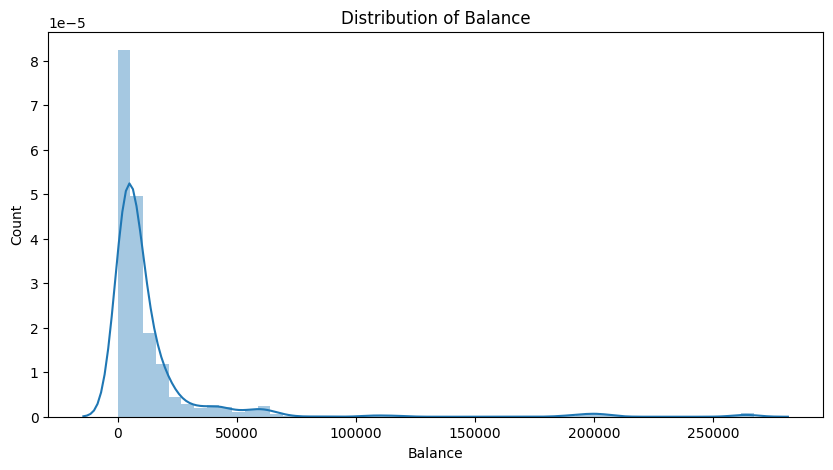

In [ ]:
## 3.2 Numerical Columns
# Balance
plt.figure(figsize = (10, 5))
sns.distplot(df['balance'])
plt.xlabel('Balance')
plt.ylabel('Count')
plt.title('Distribution of Balance')
plt.show()

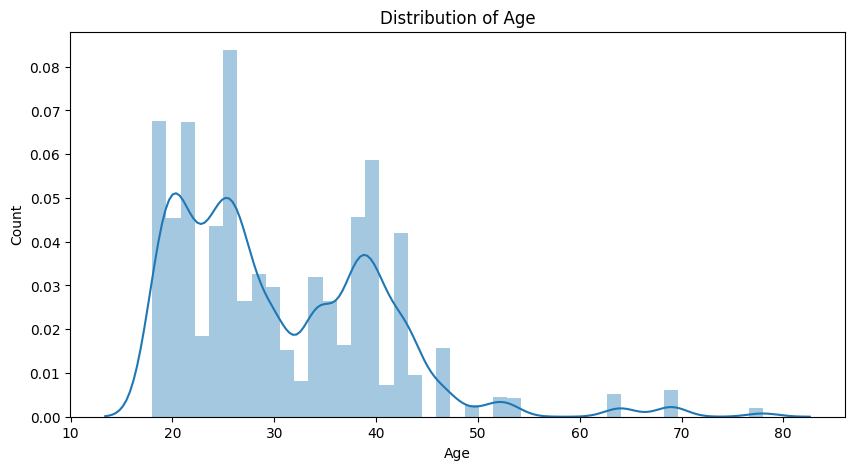

In [ ]:
# Age
plt.figure(figsize = (10, 5))
sns.distplot(df['age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

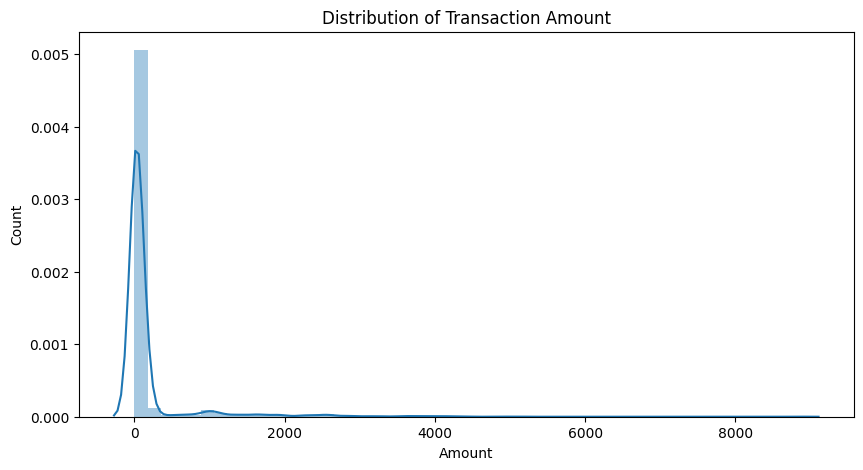

In [ ]:
# Transaction Amount
plt.figure(figsize = (10, 5))
sns.distplot(df['amount'])
plt.xlabel('Amount')
plt.ylabel('Count')
plt.title('Distribution of Transaction Amount')
plt.show()

## **Feature Engineering**

Feature Engineering involves:
1. Dropping unwanted columns
2. Dealing with missing values
3. Coming up with additional features

Recall that not all transactions are purchase related, and hence could contribute to the missing values.

We will use the `.loc[]` function:
- It's an indexing method in pandas that allows you to select rows and columns from a dataframe using labels.
- Particularly useful for selection data based on labels rather than integer positions.
- `df.loc[0:1, ['A','C']]` selects rows 0:1, and columns 'A' and 'C'
- `df.loc[df['A'] . 2]` selects column A and row values greater than 2.



In [ ]:
# Filter numSales data (i.e. Sales POS/POS)
numSales = df.loc[(df['txn_description'] != 'POS') & (df['txn_description'] != 'SALES-POS')]
missing = numSales.isnull().sum().sort_values(ascending=False)
print(missing)

# No change in the number of missing values in the Merchant Suburb, Merchant ID columns
# Confirms out hypothesis that the missing values are coming from sales related transactions

merchant_suburb      4326
merchant_long_lat    4326
merchant_id          4326
card_present_flag    4326
merchant_state       4326
bpay_biller_code     3443
merchant_code        3443
status                  0
customer_id             0
country                 0
transaction_id          0
amount                  0
extraction              0
date                    0
age                     0
gender                  0
balance                 0
first_name              0
txn_description         0
long_lat                0
currency                0
account                 0
movement                0
dtype: int64


In [42]:
# Use a for loop to fill na values for all the categorical variables
cols = ["card_present_flag", "merchant_state", "merchant_id", "merchant_suburb", "merchant_long_lat"]
for col in cols:
  df[col] = df[col].fillna("n/a", inplace = True)

missing = df.isnull().sum()
missing = missing[missing > 0]
df.drop(["merchant_code", "bpay_biller_code"], axis = 1)
df.isna().sum().max()

12043

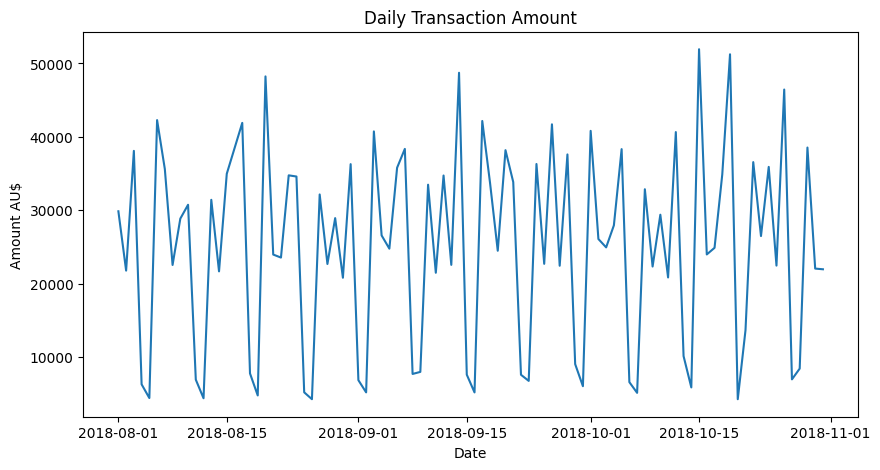

In [43]:
## 4.5 Create a Time Series plot for Daily Total Transaction Amounts
daily_amount = pd.DataFrame(df.groupby('date')['amount'].sum())
plt.figure(figsize = (10, 5))
sns.lineplot(data = daily_amount, x = daily_amount.index, y = 'amount')
plt.xlabel('Date')
plt.ylabel('Amount AU$')
plt.title('Daily Transaction Amount')
plt.show()

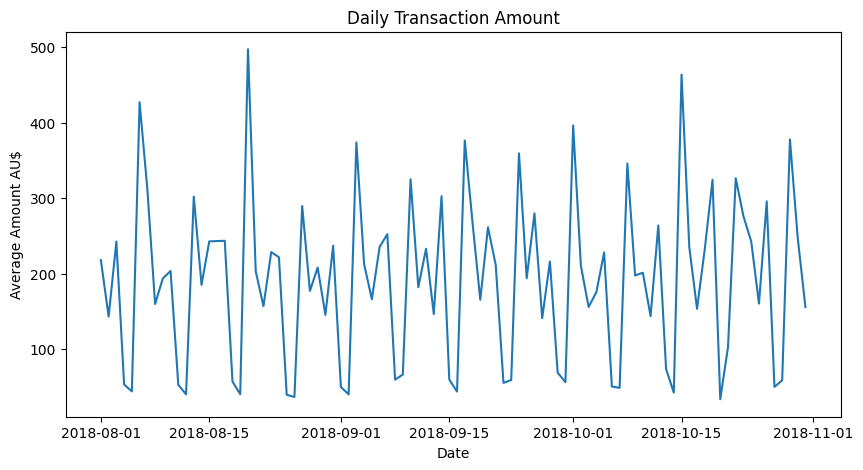

In [10]:
## 4.56 Create a Time Series plot for Daily Average Transaction Amounts
daily_amount = pd.DataFrame(df.groupby('date')['amount'].mean())
plt.figure(figsize = (10, 5))
sns.lineplot(data = daily_amount, x = daily_amount.index, y = 'amount')
plt.xlabel('Date')
plt.ylabel('Average Amount AU$')
plt.title('Daily Transaction Amount')
plt.show()

The above plots show strong time trends. This indicates that some transactions follow a common trend. For example, salaries are paid on certain day of the week, fortnightly, or on a certain day of the month.

These trends can also reveal people's spending behaviour (for example, people tend to spend more over the weekend).

In [46]:
## 4.7 Create Month, Day of Week, Hour features
df['month'] = pd.to_datetime(df.date).dt.month
df['day_of_week'] = pd.to_datetime(df.date).dt.dayofweek
df['hour'] = pd.to_datetime(df.extraction).dt.hour
df.hour.describe()

,hour
count,12043.000000
mean,13.268621
std,5.777284
min,0.000000
25%,9.000000
50%,13.000000
75%,18.000000
max,23.000000


## **Deep Dive into purchase behaviour**

Now that we have created Monthly, Hourly, and Day of Week features, we can now go ahead and take a deeped dive into our analysis of customer transaction data.

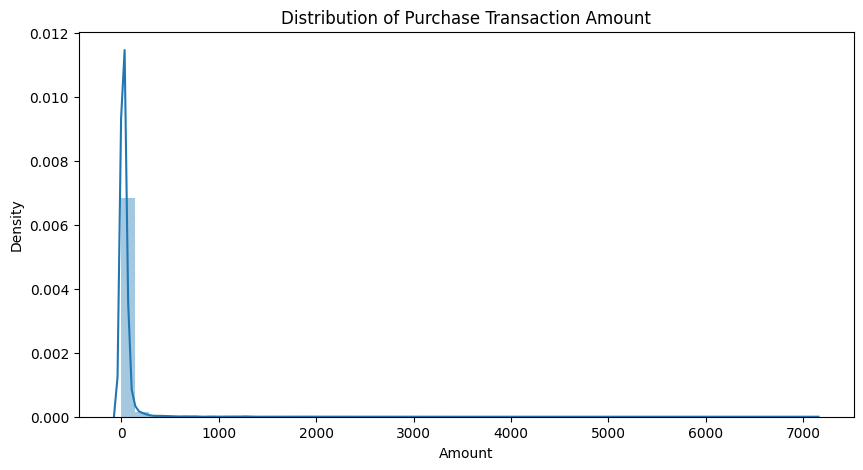

In [20]:
# Purchase amount and overall amount (look at only amounts for POS and Sales-POS)
purchase = df.loc[(df['txn_description'] == 'POS') | (df['txn_description'] == 'SALES-POS'), ['amount']]
plt.figure(figsize = (10, 5))
sns.distplot(purchase)
plt.xlabel('Amount')
plt.ylabel('Density')
plt.title('Distribution of Purchase Transaction Amount')
plt.show()

In [39]:
# Compare variances/standard between Purchase Transaction Amount and Total Transaction Amount
total_amount = df.amount.describe()
purchase_amount = purchase.amount.describe()
variances = pd.DataFrame({'Total Transaction Amount': total_amount, 'Purchase Transaction Amount': purchase_amount})
variances

# There seems to be a signficant difference between the standard deviations of Total and Purchase Transaction Amounts

,Total Amount,Purchase Amount
count,12043.000000,7717.000000
mean,187.933588,40.153732
std,592.599934,149.833070
min,0.100000,0.100000
25%,16.000000,12.080000
50%,29.000000,19.700000
75%,53.655000,33.910000
max,8835.980000,7081.090000


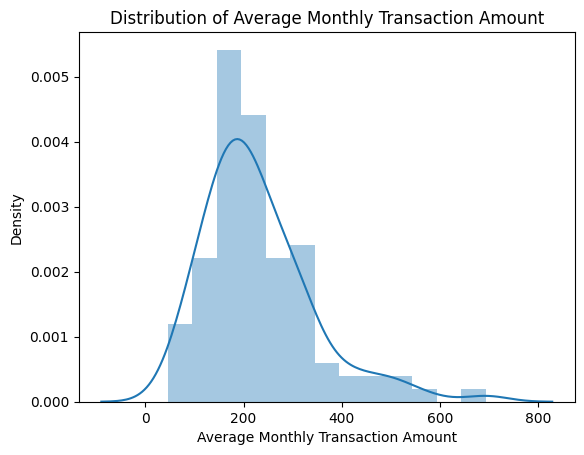

In [51]:
# Average Monthly transaction amount for each customer
customer_monthly_avg_amount = pd.DataFrame(df.groupby(['customer_id'])['amount'].mean()).reset_index()
customer_monthly_avg_amount.head(5)

sns.distplot(customer_monthly_avg_amount['amount'])
plt.xlabel('Average Monthly Transaction Amount')
plt.ylabel('Density')
plt.title('Distribution of Average Monthly Transaction Amount AU$')
plt.show()

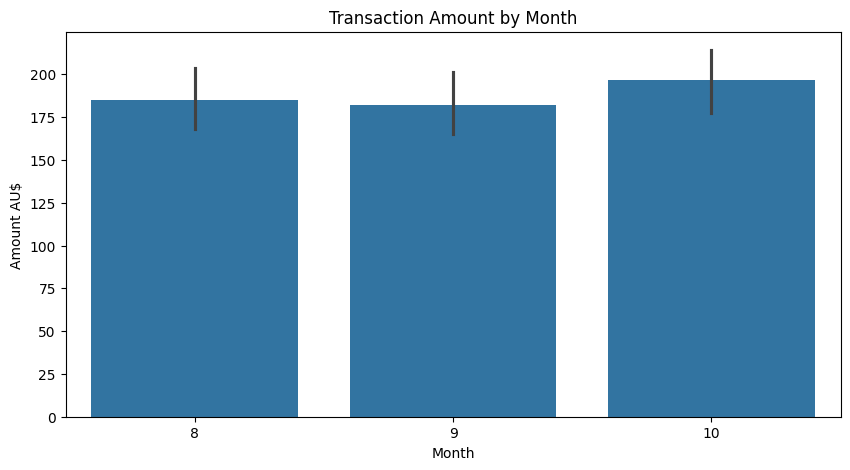

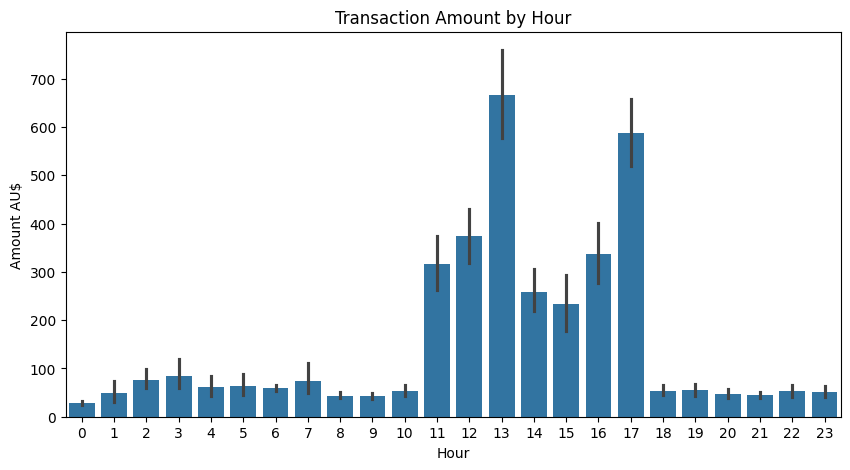

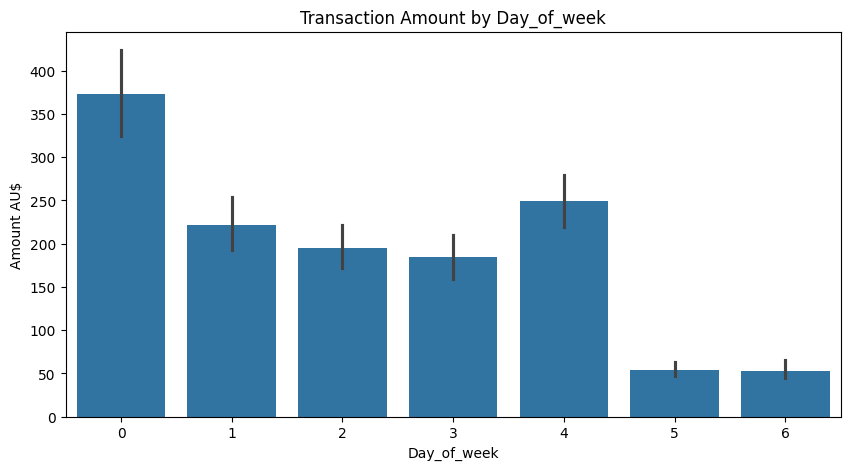

In [56]:
# Check transaction amounts per month, hour, and day of week. Use a for-loop
vals = ['month', 'hour', 'day_of_week']
for val in vals:
    plt.figure(figsize=(10, 5))
    sns.barplot(data=df, x=val, y='amount')
    plt.xlabel(val.capitalize())  # Dynamically set the x-axis label
    plt.ylabel('Amount AU$')          # y-axis label
    plt.title(f'Transaction Amount by {val.capitalize()}')  # Dynamic title
    plt.show()

Text(0, 0.5, 'Average Transaction Amount')

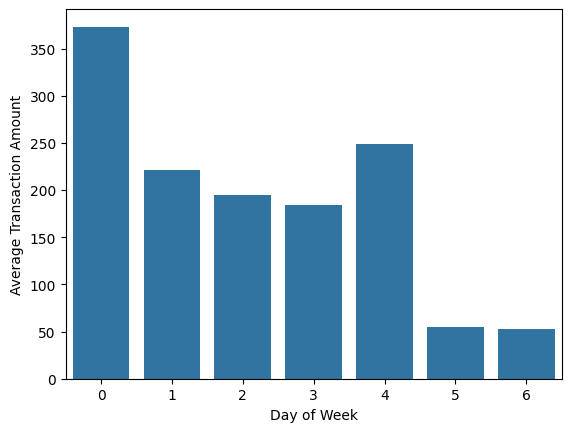

In [57]:
# Calculate the average transaction amount by day of week
day_of_week_avg = pd.DataFrame(df.groupby('day_of_week')['amount'].mean())
sns.barplot(data=day_of_week_avg, x=day_of_week_avg.index, y='amount')
plt.xlabel('Day of Week')
plt.ylabel('Average Transaction Amount AU$')

# 0 is Monday, and so on.

Text(0, 0.5, 'Average Purchase Transaction Amount AU$')

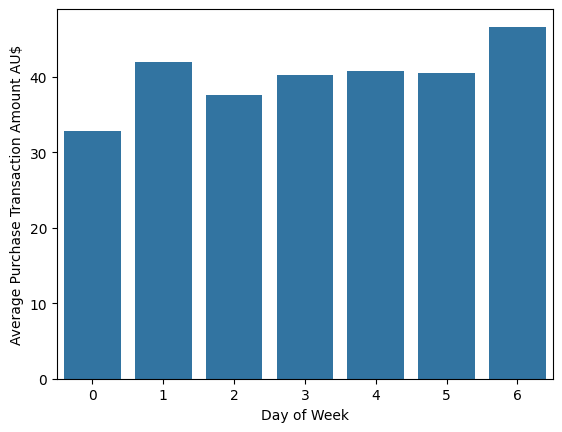

In [61]:
# Calculate the average purchase amount per day of week
purchase_day_of_week = df.loc[(df['txn_description'] == 'POS') | (df['txn_description'] == 'Sales-POS'), ['day_of_week', 'amount']]
purchase_day_of_week_avg = pd.DataFrame(purchase_day_of_week.groupby('day_of_week')['amount'].mean())
sns.barplot(data=purchase_day_of_week_avg, x=purchase_day_of_week_avg.index, y='amount')
plt.xlabel('Day of Week')
plt.ylabel('Average Purchase Transaction Amount AU$')

In [69]:
# Let's see what the average transaction values are for Purchase related transactions and Non-Purchase Related Transactions
avg_trans_amount = pd.DataFrame(df.groupby('day_of_week')['amount'].mean())

# Now do this only for POS and Sales-POS
purchase_day_of_week = df.loc[(df['txn_description'] == 'POS') | (df['txn_description'] == 'Sales-POS'), ['day_of_week', 'amount']]
purchase_day_of_week_avg = pd.DataFrame(purchase_day_of_week.groupby('day_of_week')['amount'].mean())


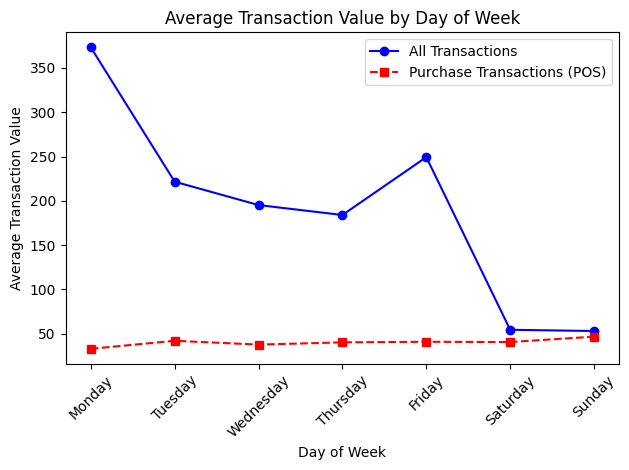

In [70]:
# Plot for all transactions (avg_trans_amount)
plt.plot(avg_trans_amount.index, avg_trans_amount['amount'],
         abel='All Transactions', marker='o', linestyle='-', color='b')

# Plot for purchase-related transactions (purchase_day_of_week_avg)
plt.plot(purchase_day_of_week_avg.index, purchase_day_of_week_avg['amount'],
         label='Purchase Transactions (POS)', marker='s', linestyle='--', color='r')

# Labels and title
plt.xlabel('Day of Week')
plt.ylabel('Average Transaction Value')
plt.title('Average Transaction Value by Day of Week')
plt.xticks(ticks=range(7),
           labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=45)

# Add a legend to differentiate the two plots
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

The average transaction amount based on purchases is highest during the weekends. This confirms one of our initial hypotheses that people tend to spend more money over the weekends.

## **Making Use of the Longitude-Latitude Data**

We have access to the locations of both customers and merchants through the `long_lat` and `merchant_long_lat` variables. With this data, we can visualize and calculate the distances between customers and their transactions, helping us identify potential outliers.

These outliers, especially when combined with the `card_present_flag` (which indicates whether the cardholder is physically present), can be crucial for flagging or identifying potentially fraudulent transactions.

### **Identifying Potential Fraud Using Distance and Frequency**

The approach I’m using helps to identify customers whose distances from a merchant are higher than the 75th percentile. After identifying these customers, we can look at how frequently their customer IDs appear in the dataset.

#### **Why the Least Frequent Customer IDs Could Indicate Fraud:**

1. **Fraudulent Transactions**: Fraudulent transactions tend to involve unusual behavior, such as purchases made from distant locations or unfamiliar merchants. Therefore, customers who have transactions at unusually high distances might be flagged as suspicious.

2. **Frequent vs. Rare Transactions**: If a customer ID appears only a few times in the dataset (or if their high-distance transactions are rare), it could indicate outlier behavior. This is worth investigating because these customers might be engaging in abnormal activity.

3. **Context**: Consider a customer who typically makes local purchases but suddenly shows up with a significantly higher transaction distance. If this customer also has fewer transactions overall, it might suggest potential fraudulent behavior or unusual activity.

In [82]:
df[['long_lat', 'merchant_long_lat']].head()

,long_lat,merchant_long_lat
0,153.41 -27.95,153.38 -27.99
1,153.41 -27.95,151.21 -33.87
2,151.23 -33.94,151.21 -33.87
3,153.10 -27.66,153.05 -26.68
4,153.41 -27.95,153.44 -28.06


In [169]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import plotly.express as px

long_lat = df[['customer_id','long_lat', 'merchant_long_lat']].dropna()
long_lat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7717 entries, 0 to 12042
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   customer_id        7717 non-null   object
 1   long_lat           7717 non-null   object
 2   merchant_long_lat  7717 non-null   object
dtypes: object(3)
memory usage: 241.2+ KB


In [170]:
# Ensure that the column is split into two separate columns
long_lat[['long', 'lat']] = long_lat['long_lat'].str.split(' ', expand=True)
long_lat[['merchant_long', 'merchant_lat']] = long_lat['merchant_long_lat'].str.split(' ', expand=True)

# Convert the new columns to float (optional, but necessary for geographical data)
long_lat['cust_long'] = long_lat['long'].astype(float)
long_lat['cust_lat'] = long_lat['lat'].astype(float)
long_lat['merchant_long'] = long_lat['merchant_long'].astype(float)
long_lat['merchant_lat'] = long_lat['merchant_lat'].astype(float)

# Check the result
long_lat.head()
long_lat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7717 entries, 0 to 12042
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7717 non-null   object 
 1   long_lat           7717 non-null   object 
 2   merchant_long_lat  7717 non-null   object 
 3   long               7717 non-null   object 
 4   lat                7717 non-null   object 
 5   merchant_long      7717 non-null   float64
 6   merchant_lat       7717 non-null   float64
 7   cust_long          7717 non-null   float64
 8   cust_lat           7717 non-null   float64
dtypes: float64(4), object(5)
memory usage: 602.9+ KB


In [171]:
# Create a scatter mapbox plot for customer locations
fig = px.scatter_mapbox(long_lat,
                        lat='cust_lat', lon='cust_long',
                        title="Customer and Merchant Locations",
                        color_discrete_sequence=["red"],
                        labels={"cust_lat": "Latitude", "cust_long": "Longitude"})

# Plot merchant locations on the same map
fig.add_scattermapbox(lat=long_lat['merchant_lat'], lon=long_lat['merchant_long'],
                      mode='markers', marker=dict(size=10, color='blue'),
                      name='Merchant Locations')

# Set up map style and zoom
fig.update_layout(mapbox_style="open-street-map",
                  mapbox_zoom=10,
                  mapbox_center={"lat": long_lat['cust_lat'].mean(), "lon": long_lat['cust_long'].mean()})

# Show the plot
fig.show()

In [161]:
pip install haversine


In [173]:
# Let's measure the distance between Merchants and Customers
from haversine import haversine, Unit

from math import radians, cos, sin, sqrt, atan2

# Define the Haversine function to calculate the distance
def haversine(lon1, lat1, lon2, lat2):
    # Convert latitude and longitude from degrees to radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    # Radius of Earth in kilometers (can also use miles by changing the value of R)
    R = 6371.0
    distance = R * c
    return distance


# Apply the Haversine function row-wise to calculate the distance for each row
long_lat['distance_km'] = long_lat.apply(lambda row: haversine(row['cust_long'], row['cust_lat'], row['merchant_long'], row['merchant_lat']), axis=1)

# Display the DataFrame with the new 'distance_km' column
print(long_lat[['long_lat', 'merchant_long_lat', 'distance_km']])


            long_lat merchant_long_lat  distance_km
0      153.41 -27.95     153.38 -27.99     5.335071
1      153.41 -27.95     151.21 -33.87   690.864475
2      151.23 -33.94     151.21 -33.87     7.999496
3      153.10 -27.66     153.05 -26.68   109.083222
4      153.41 -27.95     153.44 -28.06    12.581042
...              ...               ...          ...
12038  149.83 -29.47     145.23 -37.81  1020.083051
12039  151.22 -33.87     150.88 -33.96    32.931549
12040  151.12 -33.89     150.92 -33.74    24.891694
12041  144.96 -37.76     145.09 -37.91    20.212231
12042  150.92 -33.77     151.19 -33.93    30.630332

[7717 rows x 3 columns]


In [179]:
# Check the distance, identify any potential outliers
long_lat.distance_km.describe()

,distance_km
count,7717.000000
mean,562.294983
std,1366.803804
min,0.000000
25%,15.119940
50%,29.996920
75%,299.120476
max,10897.288267


In [181]:
# Check the median
long_lat.distance_km.median()


29.99691967326928

In [199]:
# Calculate the median distance for each customer
median_distance = long_lat.groupby('customer_id')['distance_km'].median().reset_index()
median_distance.head()

,customer_id,distance_km
0,CUS-1005756958,23.451279
1,CUS-1117979751,25.279085
2,CUS-1140341822,46.710171
3,CUS-1147642491,19.957523
4,CUS-1196156254,871.908404


In [219]:
# Identify those customers whos distance is greater than the 75th percentile
outliers = long_lat[long_lat['distance_km'] > long_lat['distance_km'].quantile(0.75)]
outliers = outliers[['customer_id', 'distance_km']]
outliers.customer_id.value_counts()

,count
customer_id,
CUS-4023861240,104
CUS-1196156254,104
CUS-2178051368,96
CUS-809013380,79
CUS-1617121891,79
...,...
CUS-2348881191,2
CUS-3255104878,2
CUS-2370108457,2


#### **To summarize:**
- **Outliers by Distance**: We are already identifying customers whose transactions are significantly farther than most (i.e., those above the 75th percentile).
  
- **Frequency of Occurrence**: If these customers also appear less frequently in the dataset, it might indicate that their high-distance transactions are out of the ordinary and deserve further investigation.
